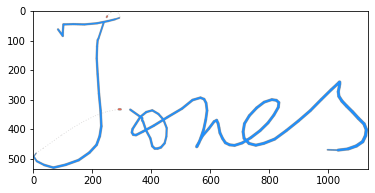

In [22]:
import matplotlib.pyplot as plt


#image scanner
import matplotlib.image as mpimg

#loading 5 test images
img1 = mpimg.imread("02-01-Genuine-0-1-1.png")


plt.imshow(img1)